# Submission Part-2 Model Architecture
---

### Restore pickle data

In [1]:
import pickle
import pprint
pkl_file = open('traffic_sign_preprocess_data.pkl', 'rb')

data = pickle.load(pkl_file)

#pprint.pprint(data)

pkl_file.close()

In [2]:
train_features = data["train_features"]
test_features = data["test_features"]
train_labels= data["train_labels"]
test_labels= data["test_labels"]

## Assign to local variable names

In [3]:
X_train = train_features
X_test = test_features
y_train = train_labels
y_test = test_labels

In [4]:
print(train_features.shape)

(39209, 32, 32)


## Visualize Data

View a sample from the dataset and check if it is valid.

10


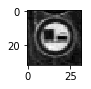

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(train_features))
image = train_features[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(train_labels[index])

## Split train and validation dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)

(31367, 32, 32)
(31367,)


In [8]:
# Reshape into 4D
X_train = X_train.reshape(-1,32,32,1)
X_validation = X_validation.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [9]:
print(X_train.shape)
print(y_train.shape)

(31367, 32, 32, 1)
(31367,)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [10]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## SOLUTION: Implement 3-layer CNN + 3-layer FC.

### Input
The model architecture accepts a 32x32x1 image as input.
### Architecture
**Layer 1: Convolutional.** 5x5 filter. The output shape should be 28x28x36.

**Activation.** relu

**Pooling.** The output shape should be 14x14x36.

**Layer 2: Convolutional.** 5x5 filter. The output shape should be 10x10x64.

**Activation.** relu

**Pooling.** The output shape should be 5x5x64.

**Layer 3: Convolutional.** 5x5 filter. The output shape should be 1x1x128.

**Activation.** relu


**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 4: Fully Connected.** This should have 1024 outputs.

**Activation.** Relu

**Layer 4: Fully Connected.** This should have 128 outputs.

**Activation.** Relu

**Layer 5: Fully Connected.** This should have 64 outputs.

**Activation.** Relu

**Layer 6: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 3rd fully connected layer.

In [11]:
from tensorflow.contrib.layers import flatten

def Model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x36. 32+1-5 = 28
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 36), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(36))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x36. Output = 14x14x36. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.14+1-5=10
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 36, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # SOLUTION: Layer 3: Convolutional. Output = 1x1x128.5+1-5=1
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 1024), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(1024))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)


    # SOLUTION: Flatten. Input = 1x1x1024. Output = 1024.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 128.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 5: Fully Connected. Input = 128. Output = 64.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(64))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 6: Fully Connected. Input = 64. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [13]:
rate = 0.001

logits = Model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [16]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic-sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.8627

EPOCH 2 ...
Validation Accuracy = 0.9638

EPOCH 3 ...
Validation Accuracy = 0.9765

EPOCH 4 ...
Validation Accuracy = 0.9765

EPOCH 5 ...
Validation Accuracy = 0.9851

EPOCH 6 ...
Validation Accuracy = 0.9875

EPOCH 7 ...
Validation Accuracy = 0.9839

EPOCH 8 ...
Validation Accuracy = 0.9869

EPOCH 9 ...
Validation Accuracy = 0.9841

EPOCH 10 ...
Validation Accuracy = 0.9897

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

Test Accuracy = 0.9351


---

## Last Step: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.